# Segundo Taller de Señales y Sistemas: Series y Transformada de Fourier
## Catalina Solano Arias  Código: 218064

## Representación generalizada
##  2.3.

 Para la señal
 
$$x(t)=u(t)$$

Realice la simulación en Python para t $\epsilon$ [0,2] y determine el error relativo para n $\epsilon [0,\pm 1,\pm 2]$

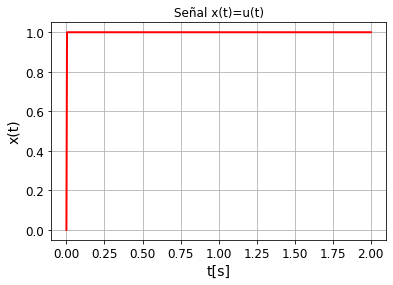

interactive(children=(IntSlider(value=1, description='n', max=2, min=-2), Output()), _dom_classes=('widget-int…

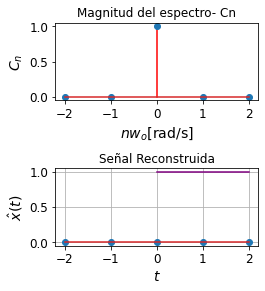

interactive(children=(IntSlider(value=1, description='Na', max=2, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest>

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
Nm = 500 # Muestras por segundo
T = 2
tv = np.linspace(0,2,Nm)

xo = np.heaviside(tv,0)

plt.plot(tv,xo,'red',linewidth=2)
plt.grid()
plt.title('Señal x(t)=u(t)')
plt.xlabel("t[s]",fontsize =14)
plt.ylabel("x(t)",fontsize =14)

N = 2 # Número de armónicos
wo = 1 # Frecuencia fundamental
# Se definen las bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)
for n in range (-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)


from ipywidgets import interact, IntSlider
def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label= "Re{$ \phi_n$(t)}")
    plt.xlabel("t[s]",fontsize=14)
    plt.ylabel("$\phi_n$(t)",fontsize=14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.title('Gráfica de bases de la exponencial compleja')
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

#Se calcula el espectro
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N,N, 2*N+1)
Cn = -((np.exp(-1j*nv*np.pi*2)-1)/(1j*nv*2*np.pi))
Cn[N] = 1

#Ahora, se gráfica el espectro

fig = plt.figure(figsize=(4,8))

plt.stem(nv,np.real(Cn),'r')
plt.title(r'Parte real del espectro- Re{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize=14)
plt.ylabel(r'$Re\{C_n\}$',fontsize=14)
plt.axis('tight')
plt.grid

plt.subplot(4,1,3)
plt.stem(nv,abs(Cn),'r')
plt.title(r'Magnitud del espectro- Cn')
plt.xlabel(r'$nw_o$[rad/s]',fontsize=14)
plt.ylabel(r'$C_n$',fontsize=14)
plt.axis('tight')
plt.grid

plt.subplot(4,1,4)
plt.stem(nv,np.arctan(-np.imag(Cn)/np.fabs(np.real(Cn))),'r')
plt.title(r'Fase del espectro')
plt.xlabel(r'$nw_o$[rad/s]',fontsize=14)
plt.ylabel(r'$C_n$',fontsize=14)
plt.axis('tight')
plt.grid

fig.tight_layout()

xe = phin @ Cn  #producto matricial para calcular componentes espectrales
plt.plot(tv,xe,color='purple')
plt.title('Señal Reconstruida')
plt.xlabel(r'$t$',fontsize = 14)
plt.ylabel(r'$\hat x(t)$',fontsize = 14)
plt.axis('tight')
plt.grid()

#Error relativo
Px= 2
def pltest(Na=1):
    ind =range (N-Na,N+Na+1)
    er = 1-(abs(Cn[N])**2+2*np.sum(abs(Cn[N:N+Na+1])**2))/Px
    xe = phin[:,ind] @ Cn [ind]
    plt.plot(tv,xe,color='b',label='xe')
    plt.plot(tv,xo,color='r',label='x')
    plt.title('Error relativo', fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend
    plt.show
    return
interact(pltest,Na=(1,N,1))

## 3. Serie de Fourier
## 3.1 
Calcular los coeficientes de la serie compleja, trignométrica y compacta de Fourier para las siguientes funciones, con
$t ∈ [−π, π]$: 

a) $t$, 

b) $|\sin(t)|$, 

c) $sgn(t)$, 

d) $|\cos^2 (t/2)|$, 

e) $e^{jt/2}$, 

f) $t^2$.

Para cada señal representada encuentre el error relativo para $n ∈ \{0, ±1, ±2, . . . , ±5\}$. Implemente las simulaciones en Python para graficar la parte real del espectro, la parte imaginaria del espectro, la magnitud del espectro, la fase del espectro y la señal reconstruida.

### a) 
Procedemos encontrando los términos $a_n$ y $b_n$ para facilitar el cálculo de $c_n$
$$a_n=\frac{2}{T}\int_{-\pi}^{\pi}t \cos(n\omega _0t)dt; \;\;\; \omega_0=\frac{2\pi}{T}=1$$
Puesto que la función es **impar**: $a_n=0$

$$b_n=\frac{2}{T}\int_{-\pi}^{\pi}t \sin(n\omega _0t)dt; \;\;\;\omega_0=1$$
Integrando por partes:
$$b_n=\frac{2}{T}\bigg[  \frac{-t\cos(nt)}{n}\bigg\vert_{-\pi}^{\pi} +\frac{1}{n}\int_{-\pi}^{\pi}\cos(nt)dt \bigg]; \;\;\; T=2\pi$$
$$b_n=-\frac{2\cos(n\pi)}{n}=\frac{2}{n}(-1)^{n+1}$$

Luego:
$$c_n=\frac{1}{2}(a_n-jb_n)=\frac{j\cos(n\pi)}{n}=\frac{j}{n}(-1)^{n}$$

$$c_0=\lim_{n \to 0}\frac{j\cos(n\pi)}{n}=\lim_{n \to 0}\frac{j\sin(n\pi)}{1}=0$$


Finalmente:
$$c_n=\begin{cases} \frac{j}{n}(-1)^{n}\;\;\; \forall \;n=\pm 1, \pm  2,\pm  3...;  \\ 0 \; para \; n=0\end{cases}$$

Para hallar los parámetros de la serie compacta de Fourier:
    $$\hat x(t)=\sum_{n=0}^{\infty}A_n\cos(n\omega_0-\theta_n)$$
$$A_n=\sqrt{a_n^2+b_n^2}=|b_n|=\bigg\vert -\frac{2\cos(n\pi)}{n}\bigg\vert = \frac{2}{n}$$
$$\theta=\tan^{-1}\bigg(\frac{a_n}{b_n}\bigg)=\tan^{-1}\bigg( -\frac{2\cos(n\pi)/2}{0}\bigg)=\frac{\pi}{2}(-1)^{n+1}$$

In [4]:
def serief(T,fs,xo,N,cn,co,bandera,px):

 Nm = T*Fs
 tv = np.arange(-T/2,T/2,T/Nm)
 xo = xo(tv)

 
 
 wo = 2*np.pi/T # frecuencia fundamentas
 # %% definir bases
 print(Nm)
 phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)
 for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)
   

 nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
 Cn = cn(nv)
 Cn[N] = co
 if bandera == 1:
        Cn[N-1] = 0
        Cn[N+1] = 0
 if bandera == 2:
        Cn[N+1] = 1/2
       

 fig = plt.figure(figsize=(8,15))
 plt.subplot(7,1,1)  
 plt.plot(tv,xo,'r',linewidth=4)
 plt.grid()
 plt.xlabel("t[s]",fontsize = 14)
 plt.ylabel("x(t)",fontsize = 14)

 plt.subplot(7,1,2)
 plt.stem(nv, np.real(Cn), 'r')
 plt.title(r'Re{Cn}')
 plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
 plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
 plt.axis('tight')
 plt.grid()

 plt.subplot(7,1,3)
 plt.stem(nv, np.imag(Cn), 'r')
 plt.title(r'Im{Cn}')
 plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
 plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
 plt.axis('tight')
 plt.grid()

 plt.subplot(7,1,4)  
 plt.stem(nv, abs(Cn), 'r')
 plt.title(r'|Cn|')
 plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
 plt.ylabel(r'$|C_n|$',fontsize = 14)
 plt.axis('tight')
 plt.grid()

 plt.subplot(7,1,5)  
 plt.stem(nv, np.arctan(np.imag(Cn)/np.real(Cn)), 'r')
 plt.title(r'|Cn|')
 plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
 plt.ylabel(r'$Espectro$',fontsize = 14)
 plt.axis('tight')
 plt.grid()
 

 plt.subplot(7,1,6)  
 xe = phin @ Cn  #producto matricial para calcular componentes espectrales
 plt.plot(tv,xe)
 plt.title("x^(t)")
 fig.tight_layout()
 Na = 10
 ind = range(N-Na,N+Na+1)
 er = 1 - (np.sum(abs(Cn)**2))/px
 
   
 xe = phin[:,ind] @ Cn[ind]
 plt.subplot(7,1,7)    
 plt.plot(tv,xe,color='b',label='xe')
 plt.plot(tv,xo,color='r',label='x')
 plt.plot(tv,xo-xe,color='g',label='Error')
 plt.title('Er=%.2f[%%]' % (100*er),fontsize=16)
 plt.xlabel('t[s]')
 plt.ylabel('x(t)')
 plt.grid()
 plt.legend()
 plt.show()

3141.592653589793


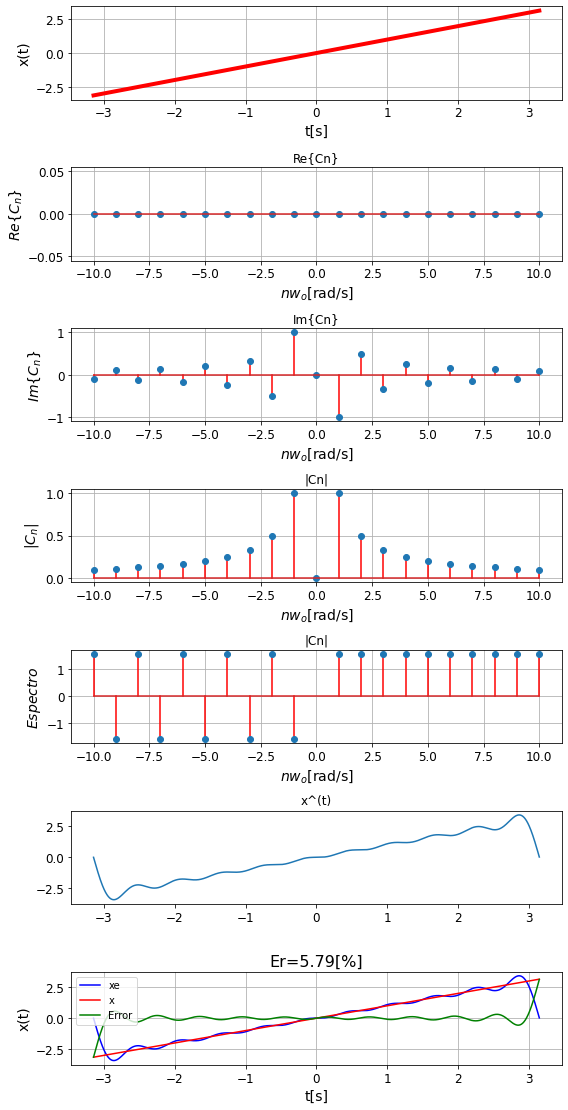

In [5]:
T = 2*np.pi
fs=1000
xo = lambda t : t
N = 10
cn = lambda n : 1j*((-1)**n)/n
co = 0
px = (1/3)*(np.pi**2)
serief(T,fs,xo,N,cn,co,0,px)

### b)
Al ser la función par, se sabe que $b_n=0$ y que:
$$a_n=\frac{2}{T}\int_{0}^{pi}|\sin t| \cos(n\omega _0t)dt; \;\;\; \omega_0=\frac{2\pi}{T}=2$$
$$a_n=\frac{2}{T}\int_{0}^{pi}\sin t \cos(2nt)dt;$$

Integrando por partes...
$$\int_{0}^{\pi}\sin t \cos(2nt)dt= \frac{\sin(2nt)\sin(t)}{2n}\bigg\vert_{0}^{\pi} -\frac{1}{2n} \int_{0}^{\pi}\sin (2nt) \cos(t)dt=\frac{1}{4n^2}\cos(2nt)\cos t \bigg\vert_{0}^{\pi}+\frac{1}{4n^2}\int_{0}^{\pi}\sin t \cos(2nt)dt $$

Luego:
$$\int_{0}^{\pi}\sin t \cos(2nt)dt=\frac{1+\cos(2n\pi)}{4n^2-1}$$
$$a_n=-\frac{2(1+\cos(2n\pi))}{\pi(4n^2-1)}=-\frac{4}{\pi(4n^2-1)}$$
$$c_n=\frac{1}{2}(c_n-jb_n)=-\frac{2}{\pi(4n^2-1)}$$
$$c_0=\frac{1}{2\pi}\int_{-\pi}^{\pi}|\sin t|dt=\frac{1}{\pi}\int_{0}^{\pi}\sin tdt=\frac{2}{\pi}$$
En consecuencia: 
$$A_n=\sqrt{a_n^2+b_n^2}=|a_n|= \frac{4}{\pi(4n^2-1)}$$
$$\theta_n=\tan^{-1}(\frac{b_n}{a_n})=\tan^{-1}(\frac{0}{-\frac{4}{\pi(4n^2-1)}})=\pi$$

3141.592653589793


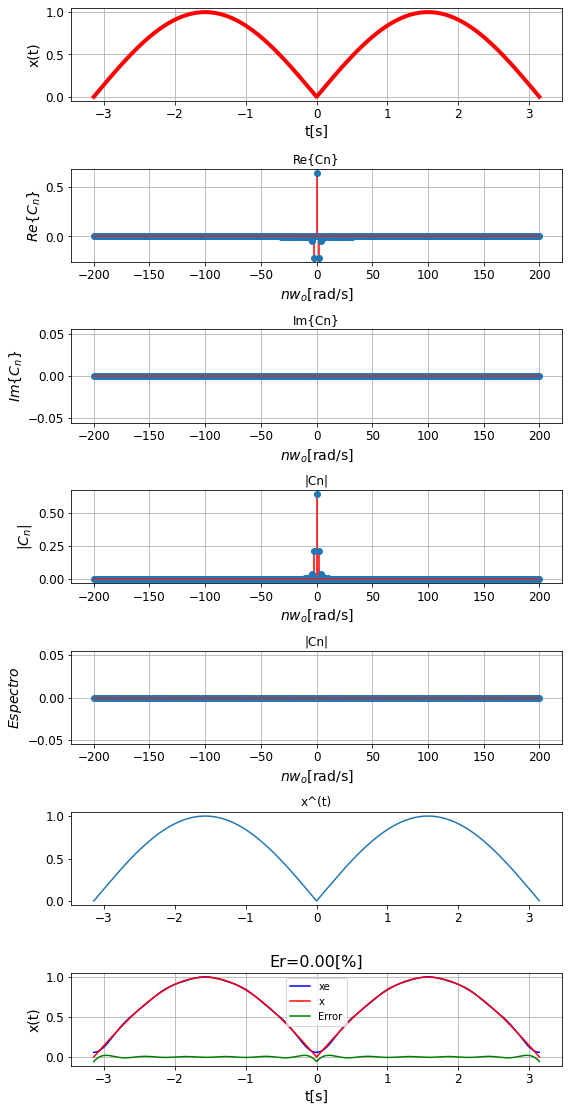

In [6]:
T = 2*np.pi
fs=1000
xo = lambda t : abs(np.sin(t))
N = 200
cn = lambda n : (1/np.pi)*(-((-1)**n/((n**2)-1))-1/((n**2)-1))
co = 2/np.pi
px = 1/2
serief(T,fs,xo,N,cn,co,1,px)

### c)
Al tratarse de una función impar, se tiene que: 
$$a_n=0$$
$$b_n=\frac{2}{T}\int_{-\pi}^{\pi}x(t)\sin(n\omega_0t)dt=\frac{4}{T}\int_{0}^{\pi}\sin(n\omega_0 t)dt; \;\; \omega_0=1; T=2\pi$$
$$b_n=\frac{2}{\pi}\int_{0}^{\pi}\sin(nt)dt=-\frac{2}{n\pi}\cos(nt)\bigg\vert_{0}^{\pi}=\frac{2}{n\pi}(1-\cos(n\pi))=\frac{2}{n\pi}(1-(-1)^n)$$

Luego:
$$c_n=\frac{1}{2}(a_n-jb_n)=-j\frac{1-(-1)^n}{n\pi}$$

$$A_n=\sqrt{a_n^2+b_n^2}=|b_n|=\bigg\vert \frac{2}{n\pi}(1-(-1)^n)  \bigg\vert=\frac{2}{n\pi}(1-(-1)^n)$$

$$\theta_n=\tan^{-1}\bigg(\frac{b_n}{a_n}\bigg)=\pi/2$$

3141.592653589793


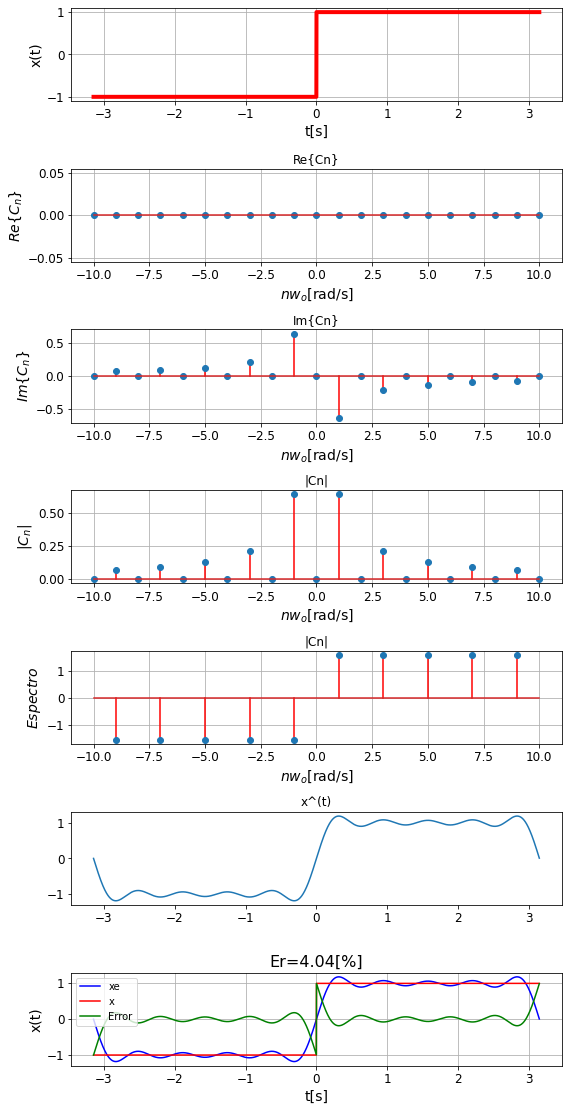

In [7]:
T = 2*np.pi
fs=1000
xo = lambda t : np.heaviside(t,1)  -np.heaviside(-t,-1)
N = 10
cn = lambda n : (1j/np.pi)*(((-1)**n) - 1)/n
co = 0
px = 0
serief(T,fs,xo,N,cn,co,0,1)

### d)
Puesto que la función es puramente par, se observa que:
$$a_n=\frac{2}{T}\int_{0}^{\pi}\cos^2(t/2) \cos(n\omega _0t)dt;$$
$$a_n=\frac{2}{T}\int_{0}^{\pi}\frac{1+\cos t}{2} \cos(n\omega _0t)dt;\;\;\;\; \omega_0=1; T=2\pi$$
$$a_n=\frac{1}{\pi} \bigg[ \int_{0}^{\pi} \cos(nt)dt  +\int_{0}^{\pi}\cos t \cos (nt)dt \bigg]=\frac{1}{\pi} \int_{0}^{\pi}\cos t \cos (nt)dt$$
Dando uso de la identidad: 
$$\cos x \cos y=\frac{1}{2}(\cos(x+y)\cos(x-y))$$

$$a_n=\frac{1}{2\pi}\bigg [\int_{0}^{\pi}\cos((n+1)t)dt + \int_{0}^{\pi}\cos((n-1)t)dt \bigg]=-\frac{\sin(n\pi)}{n\pi(n^2-1)}$$
$$c_n=\frac{1}{2}a_n=-\frac{\sin(n\pi)}{2n\pi(n^2-1)}$$


Como podemos observar, la expresión obtenida de los $c_n$ es problemática puesto que $\forall \; |n|>2$ los términos tienen valor nulo mientras que para $|n|<2$, los términos son indeterminados. Procedemos entonces dando provecho del límite:

$$c_0=\frac{1}{2\pi}\int_{-\pi}^{\pi}\cos^2(t/2)dt=\frac{t+\sint}{4\pi}\bigg\vert_{0}^{\pi}=\frac{1}{4}$$

Además:
$$c_1=\lim_{n \to 1}-\frac{\sin(n\pi)}{2n\pi(n^2-1)}=-\lim_{n \to 1}\frac{n\pi\cos(2n\pi)}{2\pi(3n^2-1)}=\frac{1}{4}$$

Finalmente:

$$c_n=\begin{cases}  \frac{1}{4} \;\; para \;\;n=0\;\; ;n=1 \\ 0 \;\;\;\;\; \forall \;\; n\neq 1 \;\; ;n\neq 2  \end{cases}$$




3141.592653589793


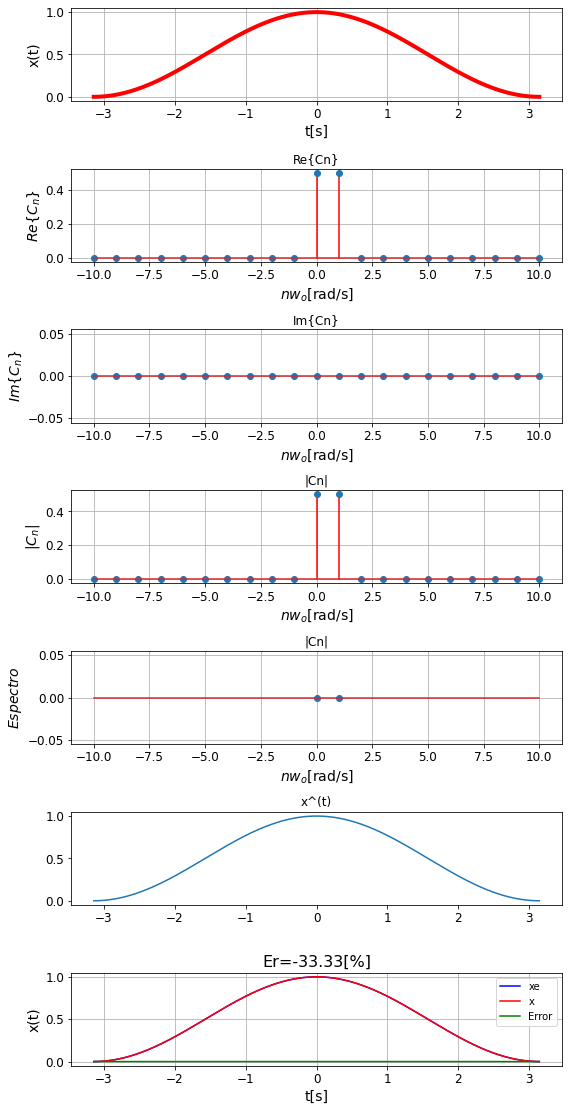

In [8]:
T = 2*np.pi
fs=1000
xo = lambda t : np.cos(t/2)**2
N = 10
cn = lambda n : 0*n
co = 1/2
px = (3/8)
serief(T,fs,xo,N,cn,co,2,px)

##### e) $x(t)=e^{j\frac{t}{2}}$

Se realiza la serie compleja:

Calculando el peso $C_{0}$:

\begin{equation}
C_{0}=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)dt=\frac{1}{2\pi}\int_{-\pi}^{\pi}e^{j\frac{t}{2}}dt=\frac{1}{2\pi}\frac{2}{j}e^{j\frac{t}{2}}|_{-\pi}^{\pi}=\frac{1}{j\pi}(cos(\frac{t}{2})+j\sin(\frac{t}{2}))|_{-\pi}^{\pi}=\frac{2}{\pi}
\end{equation}

Hayando los pesos:

\begin{equation}
C_{n}=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}x(t)e^{-jn\omega_{o}t}dt=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}e^{j\frac{t}{2}}e^{-jn\omega_{o}t}dt=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}e^{\frac{j}{2}t-jn\omega_{o}t}dt=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}e^{j(\frac{1}{2}-n\omega_{o})t}dt=\frac{1}{T}(-\frac{j}{\frac{1}{2}-n\omega_{o}}e^{j(\frac{1}{2}-n\omega_{o})t})|_{-\frac{T}{2}}^{\frac{T}{2}}=\frac{1}{T}(-\frac{2j}{1-2n\omega_{o}}e^{j(\frac{1}{2}-n\omega_{o})t})|_{-\frac{T}{2}}^{\frac{T}{2}}
\end{equation}

Evaluando $T=2\pi$ y $\omega_{o}=1$:

\begin{equation}
C_{n}=\frac{1}{2\pi}(-\frac{2j}{1-2n}e^{j(\frac{1}{2}-n)t})|_{-\pi}^{\pi}=\frac{1}{2\pi}(-\frac{2j}{1-2n}e^{j(\frac{1}{2}-n)\pi}+\frac{2j}{1-2n}e^{-j(\frac{1}{2}-n)\pi})=\frac{j}{\pi}(\frac{(-1)^{\frac{1}{2}-n}+(-1)^{\frac{1}{2}-n}}{1-2n})=\frac{2j}{\pi}(\frac{(-1)^{\frac{1}{2}-n}}{1-2n})=\frac{j}{\pi}(\frac{(-1)^{\frac{1}{2}-n}}{\frac{1}{2}-n})=\frac{2j}{\pi}(\frac{(-1)^{\frac{1}{2}-n}}{1-2n})=\frac{j}{\pi}(\frac{(-1)^{\frac{1}{2}}(-1)^{n}}{\frac{1}{2}-n})=\frac{j^{2}}{\pi}(\frac{(-1)^{n}}{\frac{1}{2}-n})=\frac{1}{\pi}(\frac{(-1)^{n}}{\frac{1}{2}-n})
\end{equation}

Como el $C_{n}$, es de naturaleza real se tiene por relación que: 

\begin{equation}
C_{n}=\frac{a_{n}}{2}\rightarrow 2C_{n}=a_{n}=2\frac{1}{\pi}(\frac{(-1)^{n}}{\frac{1}{2}-n})=\frac{2}{\pi}(\frac{(-1)^{n}}{\frac{1}{2}-n})
\end{equation}

Para la serie compacta, se obtiene que:

\begin{equation}
\partial_{n}=\sqrt{a_{n}^{2}+b_{n}^{2}}=\sqrt{a_{n}^{2}}=b_{n}=\frac{2}{\pi}(\frac{(-1)^{n}}{\frac{1}{2}-n})
\end{equation}

3141.592653589793


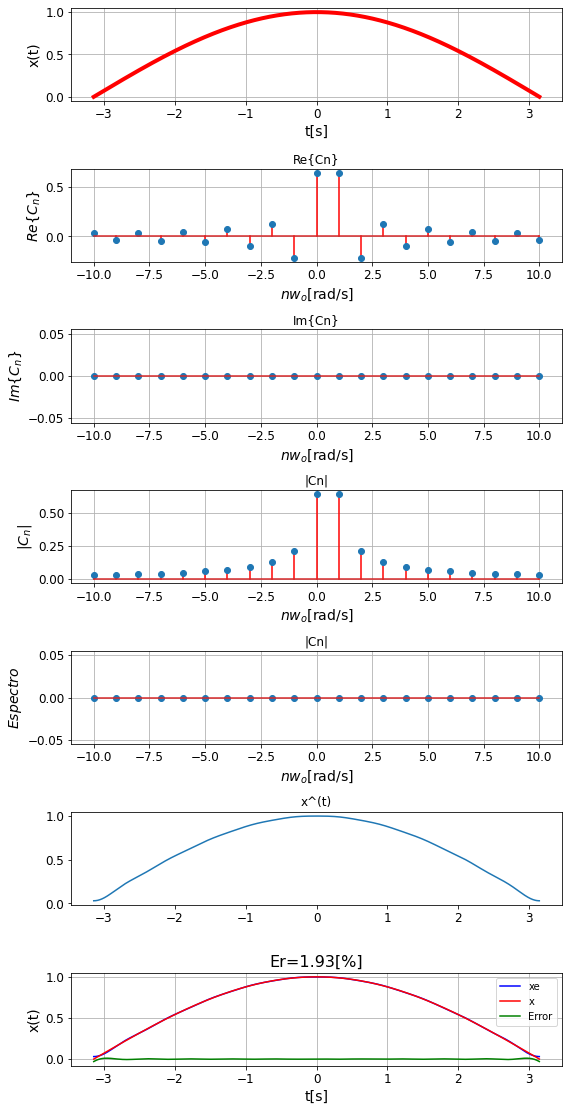

In [13]:
T = 2*np.pi
fs=1000
xo = lambda t :  np.exp(1j*t/2)
N = 10
cn = lambda n : (1/(np.pi*(1/2 - n)))*((-1)**n)
co = 2/np.pi
px=1
serief(T,fs,xo,N,cn,co,0,px)

### f)
Puesto que la función es puramente par, se obtiene que $b_n=0$:
$$a_n=\frac{2}{T}\int_{-\pi}^{\pi}t^2\cos(n\omega_o t)dt \;\;\; ; \;\;\; \omega_0=1 \therefore T=2\pi$$
$$a_n=4\int_{0}^{\pi}t^2\cos(nt)dt=\frac{2}{\pi}\bigg[ \frac{t^2\sin(nt)}{n}\bigg\vert_{0}^{\pi} -\frac{2}{n}\int_{0}^{\pi}\sin(nt)dt \bigg]$$
$$=\frac{2}{\pi}\bigg[ \frac{2t\cos(nt)}{n^2}\bigg\vert_{0}^{\pi} +\frac{2}{n^2}\int_{0}^{\pi}\cos(nt)dt \bigg]=\frac{4t\cos(nt)}{\pi n^2}\bigg\vert_{0}^{\pi}=\frac{4\cos(n\pi)}{n^2}=(-1)^n\frac{4}{n^2}$$

El resultado obtenido tras integrar por partes dos veces es útil para la obtención de $c_n$:
$$c_n=\frac{1}{2}a_n=\frac{2(-1)^n}{n^2}$$

A su vez:
$$c_0=\frac{1}{T}\int_{-\pi}^{\pi}t^2=\frac{\pi^2}{3}$$

De modo que:
$$A_n=\sqrt{a_n^2+b_n^2}=|a_n|=\frac{4}{n^2}$$
$$\theta_n=\tan^{-1}(\frac{b_n}{a_n})=\tan^{-1}(\frac{0}{(-1)^n\frac{4}{n^2}})=n\pi$$

3141.592653589793


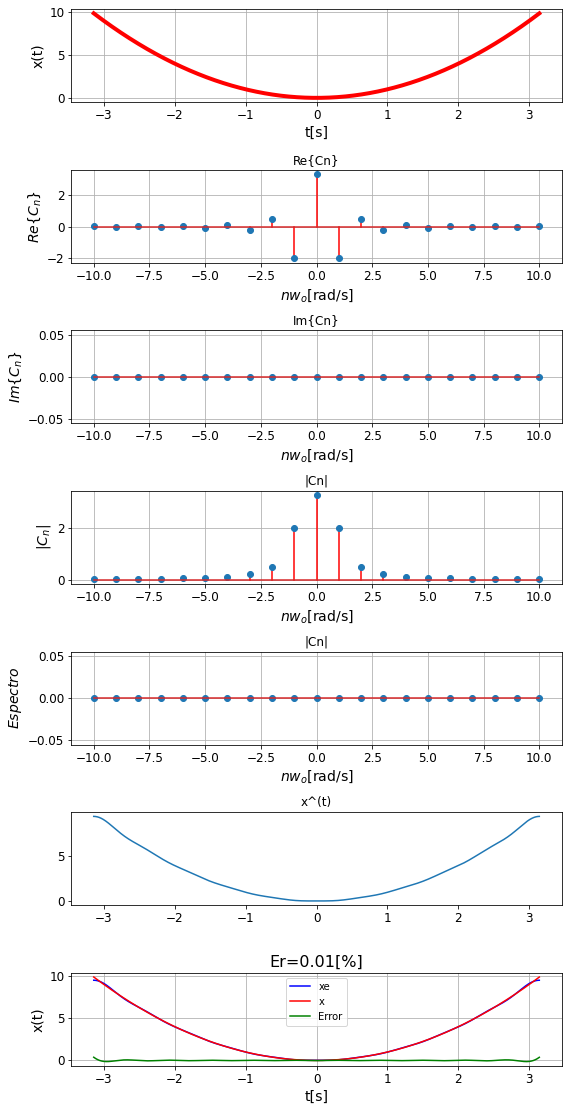

In [10]:
T = 2*np.pi
fs=1000
xo = lambda t :  t**2
N = 10
cn = lambda n : (2/(n**2))*((-1)**n)
co = (np.pi**2)/3
px = (np.pi**4)/5
serief(T,fs,xo,N,cn,co,0,px)

## 3.2 
Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t ∈ [t_i , t_f ]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

$$c_n=\frac{1}{(t_i-t_f)n^2\omega_0^2}\int_{t_i}^{t_f}x''(t)e^{-jn\omega_0t}dt; \;\;\; n \in Z$$

Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?

En sí, la serie de Fourier llevada al límite define a la señal a reconstruir, luego:

$$x(t)=\sum_{n=-\infty}^{\infty}c_ne^{jn\omega_0}$$
$$x'(t)=\sum_{n=-\infty}^{\infty}(j\omega_0 n)c_ne^{jn\omega_0}$$
$$x''(t)=\sum_{n=-\infty}^{\infty}(j \omega_0 n)^2 c_ne^{jn\omega_0}=-\sum_{n=-\infty}^{\infty}\omega_0^2 n^2 c_ne^{jn\omega_0}$$

Se define:
$$c_n''\doteq -n^2\omega_0^2c_n \;\;\; \therefore \;\;\; c_n=-\frac{1}{n^2\omega_0^2}c_n''$$

Nótese que:
$$c_n''=\frac{1}{T}\int_{T}x''(t)e^{-jn\omega_0 t}dt$$

Luego: 

$$c_n=-\frac{1}{n^2\omega_0^2T}\int_{T}x''(t)e^{-jn\omega_0 t}dt$$
$$c_n=\frac{1}{n^2\omega_0^2(t_1-t_f)}\int_{t_i}^{t_f}x''(t)e^{-jn\omega_0 t}dt$$

Para conocer los coeficientes de la serie trigonométrica se procede de manera análoga:
$$x(t)=c_0+\sum_{n=1}^{\infty}a_n\cos(n\omega_0t)+\sum_{n=1}^{\infty}b_n\sin(n\omega_0t)$$
$$x''(t)=-\sum_{n=1}^{\infty}a_nn^2\omega_0^2\cos(n\omega_0t)-\sum_{n=1}^{\infty}b_n n^2\omega_0^2 \sin(n\omega_0t)$$

Se definen:

$$a_n'' \doteq -a_nn^2\omega_0^2 \;\;\; \therefore \;\;\; a_n=-\frac{1}{n^2\omega_0^2}a_n''$$
$$b_n'' \doteq -b_nn^2\omega_0^2 \;\;\; \therefore \;\;\; b_n=-\frac{1}{n^2\omega_0^2}b_n''$$

Finalmente:

$$a_n=\frac{2}{n^2\omega_0^2(t_i-t_f)}\int_{t_i}^{t_f}x''(t)\cos(n\omega_0t)dt$$
$$b_n=\frac{2}{n^2\omega_0^2(t_i-t_f)}\int_{t_i}^{t_f}x''(t)\sin(n\omega_0t)dt$$




## 3.3
Encuentre el espectro de Fourier, su magnitud y el error cuadrático medio de la representación para $n∈{0, ±1, ±2, ±3, ±4, ±5}$, a partir de $x''(t)$ para la señal $x(t)$ en la figura 1 . Compruebe el espectro obtenido con la estimación a partir de $x(t)$.

La señal es puramente par, luego:
$$b_n=0$$
$$a_n=-\frac{2}{n^2\omega_0^2T}\int_{T}x''(t)\cos(n\omega_0t)dt$$

Al derivar dos veces la señal, vemos que se obtiene:
$$x''(t)=\frac{A}{d_2-d_1}\delta(t+d_2)-\frac{A}{d_2-d_1}\delta_(t+d_1)-\frac{A}{d_2-d_1}\delta(t-d_1)+\frac{A}{d_2-d_1}\delta(t-d_2)$$
$$x''(t)=\frac{A}{d_2-d_1}(\delta(t+d_2)-\delta(t+d_1)-\delta(t-d_1)+\delta(t-d_2))$$

Luego:
$$a_n=-\frac{2}{n^2\omega_0^2T}\frac{A}{d_2-d_1}\int_{T}(\delta(t+d_2)-\delta(t+d_1)-\delta(t-d_1)+\delta(t-d_2))\cos(n\omega_0t)dt$$

Al aplicarse propiedad de selectividad y reemplazar $\omega_0=2\pi/T$, se obtiene:
$$a_n=-\frac{TA}{n^2\pi^2(d_2-d_1)} \bigg[ \cos\bigg( \frac{2n\pi d_2}{T} \bigg)- \cos \bigg( \frac{2n\pi d_1}{T}\bigg)   \bigg]=\frac{TA}{n^2\pi^2(d_1-d_2)} \bigg[ \cos\bigg( \frac{2n\pi d_2}{T} \bigg)- \cos \bigg( \frac{2n\pi d_1}{T}\bigg)   \bigg]$$

Luego:
$$c_n=\frac{1}{2}a_n=\frac{TA}{2n^2\pi^2(d_1-d_2)} \bigg[ \cos\bigg( \frac{2n\pi d_2}{T} \bigg)- \cos \bigg( \frac{2n\pi d_1}{T}\bigg)   \bigg]$$


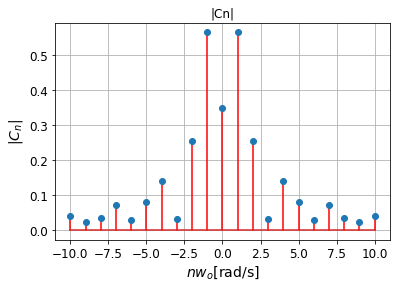

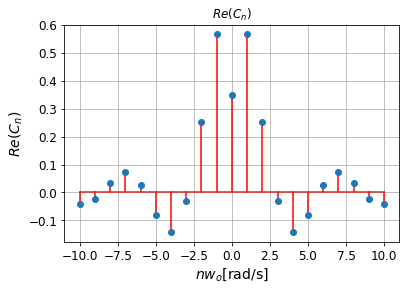

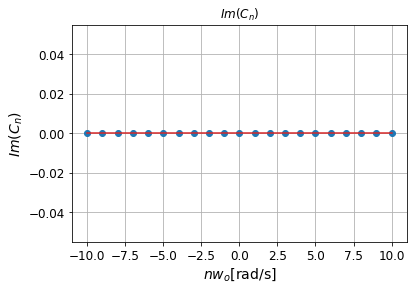

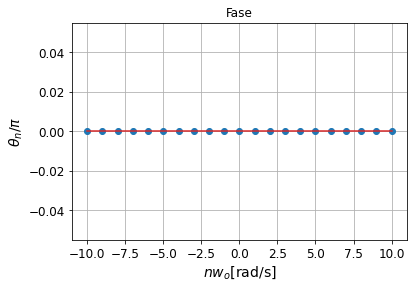

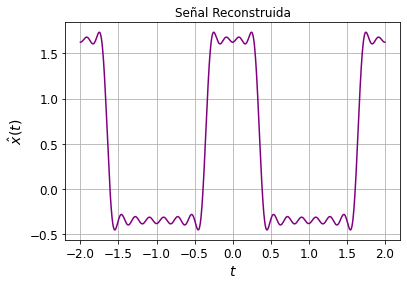

In [14]:
N=10
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
t = np.linspace(-N, N, 2*N+1)
T = 2 
Fs = 500 # 500 muestras por segundo
Nm = T*Fs #numero de muestras requeridas
tv = np.linspace(-T,T,Nm)
phin = np.zeros((int(Nm),2*N+1),dtype=np.complex_)
wo=2*np.pi/T
d1=0.3
d2=0.4
A=1
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)

    

Cn=T*A*(np.cos(2*nv*np.pi*d2/T)-np.cos(2*nv*np.pi*d1/T))/(nv**2*np.pi**2*(d1-d2))
Cn[N]=A*(d1+d2)/T




phasen=np.arctan((np.imag(Cn))/(np.real(Cn)))


#graficar espectro
#plt.figure(figsize = (10, 8))
plt.figure()
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.figure()
plt.stem(nv, np.real(Cn), 'red')
plt.title(r'$Re(C_n)$')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re(C_n)$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.figure()
plt.stem(nv, np.imag(Cn), 'blue')
plt.title(r'$Im(C_n)$')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im(C_n)$',fontsize = 14)
plt.axis('tight')
plt.grid()


plt.figure()
plt.stem(nv, phasen/np.pi, 'orange')
plt.title(r'Fase')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\theta_n/\pi$',fontsize = 14)
plt.axis('tight')
plt.grid()

 
plt.figure()
xe = phin @ Cn  #producto matricial para calcular componentes espectrales
plt.plot(tv,xe,color='purple')
plt.title('Señal Reconstruida')
plt.xlabel(r'$t$',fontsize = 14)
plt.ylabel(r'$\hat x(t)$',fontsize = 14)
plt.axis('tight')
plt.grid()


## 3.4
¿Cómo se puede simplificar el cálculo de la serie trigonométrica de Fourier para señales con simetrı́a de media onda y de cuarto de onda?. En dichos casos, ¿cómo se pueden calcular los coeficientes $a_n$ y $b_n$ con $n ∈ N$?

Toda señal $x(t)$ de **simetría de media onda** satisface que:
$$x(t \pm T/2)=-x(t)$$

A su vez, toda señal se compone de la suma de señales pares e impares, que se determinan según:
$$x_{par}(t)=\frac{x(t)+x(-t)}{2}$$
$$x_{par}(t)=\frac{x(t)-x(-t)}{2}$$

Para la obtención del $a_n$:

$$a_n=\frac{2}{T}\int_{-T/2}^{T/2}x(t)\cos(n\omega_ot)dt=\frac{2}{T}\int_{-T/2}^{0}x(t)\cos(n\omega_ot)dt+\frac{2}{T}\int_{0}^{T/2}x(t)\cos(n\omega_ot)dt$$

Recordemos que $x(t+T/2)=-x(t)$, por lo tanto:

$$a_n=-\frac{2}{T}\int_{-T/2}^{0}x(t+T/2)\cos(n\omega_ot)dt+\frac{2}{T}\int_{0}^{T/2}x(t)\cos(n\omega_ot)dt$$

Si hacemos la sustitución $u=t+T/2$

$$a_n=-\frac{2}{T}\int_{-T/2}^{0}x(u)\cos(n\omega_o(u-T/2))dt+\frac{2}{T}\int_{0}^{T/2}x(t)\cos(n\omega_ot)dt$$

Se observa que:
$$\cos[n\omega_0(u-T/2)]=\cos(n\omega_0u)\cos n\pi +\sin(n\omega_0u)\sin n\pi=\cos(n\omega_0u)\cos n\pi \;\; \omega_0=2\pi/T$$

Finalmente se obtiene:

$$a_n=\frac{2}{T}[1-\cos n\pi]\int_{0}^{T/2}x(t)\cos(n\omega_0t)dt=\begin{cases} \frac{4}{T}\int_{0}^{T/2}x(t)\cos(n\omega_0t)dt \;\;si\;\;n\;\; es\;\; impar \\ 0 \;\;\;\;\;\; si \;\; n\;\; es\;\; par \end{cases}$$

De la misma manera:

$$b_n=\frac{2}{T}[1-\cos n\pi]\int_{0}^{T/2}x(t)\sin(n\omega_0t)dt=\begin{cases} \frac{4}{T}\int_{0}^{T/2}x(t)\sin(n\omega_0t)dt \;\;si\;\;n\;\; es\;\; impar \\ 0 \;\;\;\;\;\; si \;\; n\;\; es\;\; par \end{cases}$$


Para el caso de las señales de **simetría de cuarto de onda par:**

Toda señal de simetría de cuarto de onda par, tiene simetría de media onda y además es par.

En consecuencia, se simplifica el cálculo:
$$\begin{cases}a_n=\frac{8}{T}\int_{0}^{T/4}x(t)\cos(n\omega_0t)dt  \;\;\; si \;\;n\;\;impar \\ a_n=0 \;\; si\;\; n\;\; par \\ b_n=0\;\; \forall \;\; n \end{cases}$$

Para el caso de las señales de **simetría de cuarto de onda impar:**

Toda señal de simetría de cuarto de onda impar, tiene simetría de media onda y además es impar.

En consecuencia, se simplifica el cálculo:
$$\begin{cases}b_n=\frac{8}{T}\int_{0}^{T/4}x(t)\sin(n\omega_0t)dt  \;\;\; si \;\;n\;\;impar \\ b_n=0 \;\; si\;\; n\;\; par \\ a_n=0\;\; \forall \;\; n \end{cases}$$



#### 4. ¿Cómo se puede simplificar el cálculo de la serie trigonométrica de Fourier para señales con simetría de media onda y cuarto de onda? En dichos casos, ¿cómo se se pueden calcular los coeficientes $a_{n}$ y $b_{n}$ con $n\in \mathbb{N}$?

##### MEDIA ONDA 

Se tiene que:

\begin{equation}
a_{1}=C_{-1}+C_{1}
\end{equation}

\begin{equation}
b_{1}=j(C_{-1}-C_{-1})
\end{equation}

Como a cada lado del eje Y existen dos coeficientes, tendremos en $C_{1}$ y $C_{-1}$ dos coeficientes en cada uno, los cuales estaran repartidos en media T, para completar el T de que corresponde a cada $C$


Se encuentra entonces que el $C_{1}$ es:

\begin{equation}
C_{1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)e^{-jn\omega_{o}t}dt+\frac{1}{T}\int_{\frac{T}{2}}^{T}x(t)e^{-jn\omega_{o}t}dt
\end{equation}

Se conoce que, integrar de [$0,\frac{T}{2}$] e integrar de [$\frac{T}{2},T$], da como resultado lo mismo, es posible cambiar y utilizar los primeros limites, así:

\begin{equation}
C_{1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)e^{-jn\omega_{o}t}dt+\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)e^{-jn\omega_{o}t}dt
\end{equation}

Se realiza el cambio del euler:

\begin{equation}
C_{1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)(cos(n\omega_{o}t)-jsin(n\omega{o}t))dt+\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)(cos(n\omega_{o}t)-jsin(n\omega{o}t))dt
\end{equation}

Agrupando se llega a:

\begin{equation}
C_{1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}(2x(t)cos(n\omega_{o}t)-2jx(t)sin(n\omega{o}t))dt
\end{equation}

Ahora con el $C_{-1}$:

\begin{equation}
C_{-1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)e^{jn\omega_{o}t}dt+\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)e^{jn\omega_{o}t}dt
\end{equation}

Se expande el euler, así:

\begin{equation}
C_{-1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)(cos(n\omega_{o}t)+jsin(n\omega{o}t))dt+\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)(cos(n\omega_{o}t)+jsin(n\omega{o}t))dt
\end{equation}

Agrupando nuevamente:

\begin{equation}
C_{-1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}(2x(t)cos(n\omega_{o}t)+2jx(t)sin(n\omega{o}t))dt
\end{equation}

Así se tiene que:

\begin{equation}
a_{1}=C_{1}+C_{-1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}(2x(t)cos(n\omega_{o}t)-2jx(t)sin(n\omega{o}t))dt+\frac{1}{T}\int_{0}^{\frac{T}{2}}(2x(t)cos(n\omega_{o}t)+2jx(t)sin(n\omega{o}t))dt
\end{equation}

Simplificando la expresión se obtiene que:

\begin{equation}
a_{1}=\frac{4}{T}\int_{0}^{\frac{T}{2}}x(t)\cos(n\omega_{o}t)dt
\end{equation}

Analogamente para $b_{1}$:

\begin{equation}
b_{1}=j(C_{-1}-C_{1})=j(\frac{1}{T}\int_{0}^{\frac{T}{2}}(2x(t)cos(n\omega_{o}t)+2jx(t)sin(n\omega{o}t))dt-\frac{1}{T}\int_{0}^{\frac{T}{2}}(2x(t)cos(n\omega_{o}t)-2jx(t)sin(n\omega{o}t))dt)
\end{equation}

Simplificando se tiene que:

\begin{equation}
b_{1}=-\frac{1}{T}\int_{0}^{\frac{T}{2}}4j^{2}x(t)sin(n\omega_{o}t)dt \rightarrow b_{1}=\frac{4}{T}\int_{0}^{\frac{T}{2}}x(t)sin(n\omega_{o}t)dt
\end{equation}

##### Cuarto de onda

Se encontrara entonces que el $C_{1}$ es:

\begin{equation}
C_{1}=\frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{-jn\omega_{o}t}dt + \frac{1}{T}\int_{\frac{T}{4}}^{\frac{T}{2}}x(t)e^{-jn\omega_{o}t}dt + \frac{1}{T}\int_{\frac{T}{2}}^{\frac{3T}{4}}x(t)e^{-jn\omega_{o}t}dt + \frac{1}{T}\int_{\frac{3T}{4}}^{T}x(t)e^{-jn\omega_{o}t}dt
\end{equation}

 Se conoce que, integrar en los limites [$0,\frac{T}{4}$], [$\frac{T}{4},\frac{T}{2}$], [$\frac{T}{2},\frac{3T}{4}$], [$\frac{3T}{4},T$] da como resultado lo mismo, es posible cambiar y utilizar los primeros limites, así 

\begin{equation}
C_{1}=\frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{-jn\omega_{o}t}dt + \frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{-jn\omega_{o}t}dt + \frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{-jn\omega_{o}t}dt + \frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{-jn\omega_{o}t}dt\\
C_{1} = \frac{1}{T}\int_{0}^{\frac{T}{4}}4x(t)e^{-jn\omega_{o}t}dt 
\end{equation}


Se realiza el cambio del euler:

\begin{equation}
C_{1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)4(cos(n\omega_{o}t)-jsin(n\omega{o}t))dt
\end{equation}

Ahora encontraremos el $C_{-1}$

\begin{equation}
C_{-1}=\frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{jn\omega_{o}t}dt + \frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{jn\omega_{o}t}dt + \frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{jn\omega_{o}t}dt + \frac{1}{T}\int_{0}^{\frac{T}{4}}x(t)e^{jn\omega_{o}t}dt\\
C_{-1} = \frac{1}{T}\int_{0}^{\frac{T}{4}}4x(t)e^{jn\omega_{o}t}dt 
\end{equation}

Se realiza el cambio del euler:

\begin{equation}
C_{-1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)4(cos(n\omega_{o}t) + jsin(n\omega{o}t))dt
\end{equation}

Y sumando $C_{1}$ y $C_{-1}$  tenemos que:

\begin{equation}
a_{1}=\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)4(cos(n\omega_{o}t) - jsin(n\omega{o}t))dt + \frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)4(cos(n\omega_{o}t) + jsin(n\omega{o}t))dt\\
a_{1}=\frac{8}{T}\int_{0}^{\frac{T}{2}}x(t)(cos(n\omega_{o}t)
\end{equation}

Ahora sabiendo que $b_{1}= j(C_{1}- C_{-1})$ tendremos que:
\begin{equation}
b_{1}=j[\frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)4(cos(n\omega_{o}t) - jsin(n\omega{o}t))dt - \frac{1}{T}\int_{0}^{\frac{T}{2}}x(t)4(cos(n\omega_{o}t) + jsin(n\omega{o}t))dt]\\
b_{1}=-j^{2}\frac{8}{T}\int_{0}^{\frac{T}{2}}x(t)sin(n\omega{o}t))dt)\\
b_{1}=\frac{8}{T}\int_{0}^{\frac{T}{2}}x(t)sin(n\omega{o}t))dt)
\end{equation}

Y con eso encontrariamos las formas de $a_{1}$ y $b_{1}$ en serie trigonometrica para un cuarto de onda.